In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
 %cd /content/gdrive/My Drive/HealthInformatics

/content/gdrive/My Drive/HealthInformatics


In [ ]:
text_path = "/content/gdrive/My Drive/HealthInformatics/harvard_data/smokers_surrogate_train_all_version2.xml"

In [ ]:
from bs4 import BeautifulSoup
with open(text_path, 'r') as f:
    data = f.read()

bs_data = BeautifulSoup(data, 'xml')
b_text = bs_data.find_all('TEXT')

In [ ]:
cache = []
for ele in b_text:
    cache.append(str(ele))
print(cache)

["<TEXT>\n977146916\nHLGMC\n2878891\n022690\n01/27/1997 12:00:00 AM\nCARCINOMA OF THE COLON .\nUnsigned\nDIS\nReport Status :\nUnsigned\nPlease do not go above this box important format codes are contained .\nDISCHARGE SUMMARY\nARF32 FA\nDISCHARGE SUMMARY NAME :\nGIRRESNET , DIEDREO A\nUNIT NUMBER :\n075-71-01\nADMISSION DATE :\n01/27/1997\nDISCHARGE DATE :\n01/31/1997\nPRINCIPAL DIAGNOSIS :\nCarcinoma of the colon .\nASSOCIATED DIAGNOSIS :\nUrinary tract infection , and cirrhosis of the liver .\nHISTORY OF PRESENT ILLNESS :\nThe patient is an 80-year-old male , who had a history of colon cancer in the past , resected approximately ten years prior to admission , history of heavy alcohol use , who presented with a two week history of poor PO intake , weight loss , and was noted to have acute on chronic Hepatitis by chemistries and question of pyelonephritis .\nHe lived alone but was driven to the hospital by his son because of reported worsening and general care and deconditioning .\nEm

In [ ]:
memory = []
for ele in cache:
    memory.append(ele.split("\n"))

In [ ]:
bag_ofwords = []
attr_val = []

for i in range(len(memory)):
    attr_cache = {}
    for j in range(len(memory[i])):
        cache_str = ''
        if (memory[i][j] != '') & (memory[i][j][-1] == ':'):
            bag_ofwords.append(memory[i][j])
            k = j+1
            
            cond = True
            try:
                while (k<len(memory[i])) & (memory[i][k][-1] != ':'):
                    cache_str = cache_str + memory[i][k]
                    k = k + 1
            except:
                continue
#             print(cache_str)
            attr_cache[memory[i][j]] = cache_str
    attr_val.append(attr_cache)

In [ ]:
features = ["PRINCIPAL DIAGNOSIS :","ASSOCIATED DIAGNOSIS :","HISTORY OF PRESENT ILLNESS :",
            "PAST MEDICAL HISTORY :","PHYSICAL EXAMINATION :", "LABORATORY DATA :"
            ]

In [ ]:
temp = []
indx = []
for idx,ele0 in enumerate(attr_val):
    new_data = {}
    try:
        for ele in features:
            new_data[ele] = ele0[ele]
        temp.append(new_data)
        indx.append(idx)
    except:
        continue
                    

In [ ]:
len(temp)

36

In [ ]:
indx

[0,
 6,
 12,
 13,
 21,
 31,
 32,
 45,
 46,
 49,
 70,
 76,
 79,
 80,
 81,
 89,
 97,
 104,
 116,
 117,
 132,
 147,
 156,
 191,
 192,
 202,
 206,
 207,
 208,
 211,
 212,
 213,
 217,
 252,
 290,
 296]

In [ ]:
import pandas as pd
dict_2df = pd.DataFrame.from_dict(temp)

In [ ]:
new_text = []
for idx in range(len(indx)):
    new_text.append(b_text[indx[idx]])

In [ ]:
text_df = pd.DataFrame(new_text,columns=["Text"])
dict_2df = dict_2df.merge(text_df,left_index=True, right_index=True)
dict_2df

,PRINCIPAL DIAGNOSIS :,ASSOCIATED DIAGNOSIS :,HISTORY OF PRESENT ILLNESS :,PAST MEDICAL HISTORY :,PHYSICAL EXAMINATION :,LABORATORY DATA :,Text
0,Carcinoma of the colon .,"Urinary tract infection , and cirrhosis of the...","The patient is an 80-year-old male , who had a...","Cancer , ten years prior to admission , status...","In general was a cachectic , jaundiced man .","Notable for a BUN and creatinine 14 and 1.8 , ...",\n977146916\nHLGMC\n2878891\n022690\n01/27/199...
1,Small cell lung cancer .,"Chronic obstructive pulmonary disease , left u...",The patient is a 72 year old woman with a hist...,"Severe chronic obstructive pulmonary disease ,...",The patient is an obese elderly female in no a...,Arterial blood gases 129/75/7.34 .White blood ...,\n812392414\nOMH\n4739887\n073138\n2/16/1998 1...
2,Non-Q wave myocardial infarction .,Status post anterior myocardial infarction in ...,The patient is a 65 year old Portuguese male w...,His past medical history included hypertension...,The physical examination on admission revealed...,The laboratory data revealed normal electrolyt...,\n559197012\nFIH\n4469096\n64024/p16e\n909222\...
3,Acute myocardial infarction .,Lower gastrointestinal bleed .,The patient is a 65 year old Portuguese male w...,Notable only for surgical repair of an ulcer a...,The patient was an elderly appearing male in n...,"The hematocrit was 44.9 , white blood count 14...",\n559197012\nFIH\n4469096\n52995/857a\n292657\...
4,Cryptogenic cirrhosis .,Variceal bleeding .,The patient is a 70-year-old female with crypt...,Cryptogenic cirrhosis with an unclear work up ...,"She is an obese , elderly woman in no acute di...","Notable for sodium 141 , potassium 4.2 , chlor...",\n988183518\nPUOMC\n7961198\n290757\n137082\n1...
5,Gastric outlet obstruction .,1. Obstructive jaundice .2. metastatic adenoca...,The patient is a 111y year old female who pres...,"As above ; appendectomy in 1916 , hysterectomy...",The patient was a pleasant elderly female in n...,"White count 13.8 , hematocrit 33 , platelet co...",\n378274921\nPUOMC\n0641514\n28078/70a4\n71282...
6,Status post inferior myocardial infarction .,Heart failure secondary to volume overload .Hy...,The patient is an 82 year old male transferred...,"Recurrent left pleural effusion , work up has ...",Showed an elderly male in no apparent distress...,"Potassium 4 , BUN 15 , creatinine 1.1. WBC of ...",\n831471289\nOMH\n0515320\n33912\n3/29/1997 12...
7,Pulmonary edema .,"Congestive heart failure , coronary artery dis...",Mr. State is an 81-year-old man with a history...,Is notable for an inferior myocardial infarcti...,The patient was a very pleasant man who appear...,"Notable for a sodium of 145 , potassium 3.6 , ...",\n506243692\nFIH\n6305145\n963632\n439524\n11/...
8,Pulmonary edema .,"Congestive heart failure , coronary artery dis...",Mr. Bridge is an 81-year-old man with a histor...,Is notable for an inferior myocardial infarcti...,The patient was a very pleasant man who appear...,"Notable for a sodium of 145 , potassium 3.6 , ...",\n506243692\nFIH\n6305145\n897198\n871228\n5/1...
9,Right thyroid papillary carcinoma .,1. Pulmonary and right iliac bone metastases ....,The patient is a 74 year old female with metas...,Includes a history of atrial fibrillation with...,"The patient is a pleasant , elderly female in ...",On admission the white blood count was 67.3 wi...,\n534644131\nFIH\n9393835\n24529/65a4\n204379\...


In [ ]:
# !pip install git+https://github.com/NLPatVCU/medaCy.git@development
# !pip3 install spacy
# !python3 -m spacy download en_core_web_sm

In [ ]:
# import spacy
# spacy.load('en_core_web_sm')

In [ ]:
# !pip install git+https://github.com/NLPatVCU/medaCy_model_clinical_notes.git

In [ ]:
# from medacy.model.model import Model

# model = Model.load_external('medacy_model_clinical_notes')

In [ ]:
#Make same attribute same with multiple values

In [ ]:
# for i in range(len(dict_2df)):
#   annotation = model.predict(dict_2df['Text'][i])
#   annotation_list = list(annotation)
#   ann_list = []
#   for ele in annotation_list:
#     ann_list.append((ele[0],ele[3]))
#   dict_2df.loc[i, 'Annotation'] = str(ann_list)

In [ ]:
dict_2df

,PRINCIPAL DIAGNOSIS :,ASSOCIATED DIAGNOSIS :,HISTORY OF PRESENT ILLNESS :,PAST MEDICAL HISTORY :,PHYSICAL EXAMINATION :,LABORATORY DATA :,Text
0,Carcinoma of the colon .,"Urinary tract infection , and cirrhosis of the...","The patient is an 80-year-old male , who had a...","Cancer , ten years prior to admission , status...","In general was a cachectic , jaundiced man .","Notable for a BUN and creatinine 14 and 1.8 , ...",\n977146916\nHLGMC\n2878891\n022690\n01/27/199...
1,Small cell lung cancer .,"Chronic obstructive pulmonary disease , left u...",The patient is a 72 year old woman with a hist...,"Severe chronic obstructive pulmonary disease ,...",The patient is an obese elderly female in no a...,Arterial blood gases 129/75/7.34 .White blood ...,\n812392414\nOMH\n4739887\n073138\n2/16/1998 1...
2,Non-Q wave myocardial infarction .,Status post anterior myocardial infarction in ...,The patient is a 65 year old Portuguese male w...,His past medical history included hypertension...,The physical examination on admission revealed...,The laboratory data revealed normal electrolyt...,\n559197012\nFIH\n4469096\n64024/p16e\n909222\...
3,Acute myocardial infarction .,Lower gastrointestinal bleed .,The patient is a 65 year old Portuguese male w...,Notable only for surgical repair of an ulcer a...,The patient was an elderly appearing male in n...,"The hematocrit was 44.9 , white blood count 14...",\n559197012\nFIH\n4469096\n52995/857a\n292657\...
4,Cryptogenic cirrhosis .,Variceal bleeding .,The patient is a 70-year-old female with crypt...,Cryptogenic cirrhosis with an unclear work up ...,"She is an obese , elderly woman in no acute di...","Notable for sodium 141 , potassium 4.2 , chlor...",\n988183518\nPUOMC\n7961198\n290757\n137082\n1...
5,Gastric outlet obstruction .,1. Obstructive jaundice .2. metastatic adenoca...,The patient is a 111y year old female who pres...,"As above ; appendectomy in 1916 , hysterectomy...",The patient was a pleasant elderly female in n...,"White count 13.8 , hematocrit 33 , platelet co...",\n378274921\nPUOMC\n0641514\n28078/70a4\n71282...
6,Status post inferior myocardial infarction .,Heart failure secondary to volume overload .Hy...,The patient is an 82 year old male transferred...,"Recurrent left pleural effusion , work up has ...",Showed an elderly male in no apparent distress...,"Potassium 4 , BUN 15 , creatinine 1.1. WBC of ...",\n831471289\nOMH\n0515320\n33912\n3/29/1997 12...
7,Pulmonary edema .,"Congestive heart failure , coronary artery dis...",Mr. State is an 81-year-old man with a history...,Is notable for an inferior myocardial infarcti...,The patient was a very pleasant man who appear...,"Notable for a sodium of 145 , potassium 3.6 , ...",\n506243692\nFIH\n6305145\n963632\n439524\n11/...
8,Pulmonary edema .,"Congestive heart failure , coronary artery dis...",Mr. Bridge is an 81-year-old man with a histor...,Is notable for an inferior myocardial infarcti...,The patient was a very pleasant man who appear...,"Notable for a sodium of 145 , potassium 3.6 , ...",\n506243692\nFIH\n6305145\n897198\n871228\n5/1...
9,Right thyroid papillary carcinoma .,1. Pulmonary and right iliac bone metastases ....,The patient is a 74 year old female with metas...,Includes a history of atrial fibrillation with...,"The patient is a pleasant , elderly female in ...",On admission the white blood count was 67.3 wi...,\n534644131\nFIH\n9393835\n24529/65a4\n204379\...


In [ ]:
# dict_2df['Text'][0]

In [ ]:
# download_path = "/content/gdrive/My Drive/HealthInformatics/harvard_data/medical_text.csv"
# dict_2df.to_csv(download_path)

In [ ]:
!pip install scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_bc5cdr_md-0.5.1.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_bc5cdr_md-0.5.1.tar.gz (120.2 MB)


In [ ]:
df = dict_2df

In [ ]:
import spacy
import scispacy
nlp_obj = spacy.load("en_ner_bc5cdr_md")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
nlp_obj.component_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer', 'parser', 'ner']

In [ ]:
nlp_obj.get_pipe("ner").labels

('CHEMICAL', 'DISEASE')

In [ ]:
x=df['Text'][0]
dataofx= nlp_obj(x)

In [ ]:
from spacy import displacy
displacy.render(dataofx, style='ent', jupyter = True)

In [ ]:
###Function to extract all the disease
def diseaseExtract(text):
  dataofx = nlp_obj(text)
  results = [ent.text for ent in dataofx.ents if ent.label_ == 'DISEASE']
  return results

In [ ]:
df['Disease'] = df['Text'].apply(lambda x:diseaseExtract(x))

In [ ]:
def chemicalExtract(text):
  dataofx = nlp_obj(text)
  results = [ent.text for ent in dataofx.ents if ent.label_ == 'CHEMICAL']
  return results

In [ ]:
df['Chemicals'] = df['Text'].apply(lambda x:chemicalExtract(x))

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df['Disease'].to_list()

In [ ]:
##Get most common disease for each category
def get_common_disease(x):
  disease_list = df['Disease'].tolist()
  disease_list = [i for j in disease_list for i in j]
  return disease_list

surgery_disease = get_common_disease('Surgery')

In [ ]:
import matplotlib.pyplot as plt

##Function to plot the disease and chemical
from wordcloud import WordCloud
def plot_disease_cloud(text):
  mywordcloud = WordCloud().generate(text)
  plt.imshow(mywordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

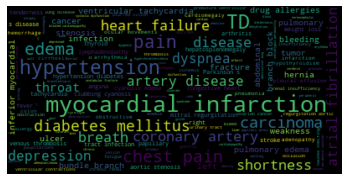

In [ ]:
plot_disease_cloud(' '.join(surgery_disease))

In [ ]:
##Get most common chemicals for each category
def get_common_chemicals(x):
  chemical_list = df['Chemicals'].tolist()
  chemical_list = [i for j in chemical_list for i in j]
  return chemical_list

chemicals = get_common_chemicals('Chemicals')

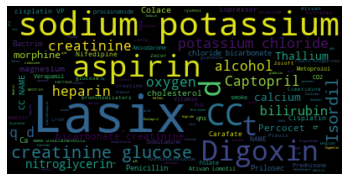

In [ ]:
plot_disease_cloud(' '.join(chemicals))

In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_bionlp13cg_md-0.5.1.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 120.2 MB 56 kB/s 
  Created wheel for en-ner-bionlp13cg-md: filename=en_ner_bionlp13cg_md-0.5.1-py3-none-any.whl size=120241162 sha256=a772f7beb30dbc732e75ef924a1e83e1058e07189a2f5ecdd123b13640a6d33d
  Stored in directory: /root/.cache/pip/wheels/b5/95/20/49fa0282c8ebe95c2dbfdf0b90b00dd3a9aa25f0b5f1d1bc03
Successfully built en-ner-bionlp13cg-md


In [ ]:
#create new NLP object for another model that checks biological attributes
nlp_obj2 = spacy.load("en_ner_bionlp13cg_md")

In [ ]:
nlp_obj2.component_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer', 'parser', 'ner']

In [ ]:
nlp_obj2.get_pipe("ner").labels

('AMINO_ACID',
 'ANATOMICAL_SYSTEM',
 'CANCER',
 'CELL',
 'CELLULAR_COMPONENT',
 'DEVELOPING_ANATOMICAL_STRUCTURE',
 'GENE_OR_GENE_PRODUCT',
 'IMMATERIAL_ANATOMICAL_ENTITY',
 'MULTI_TISSUE_STRUCTURE',
 'ORGAN',
 'ORGANISM',
 'ORGANISM_SUBDIVISION',
 'ORGANISM_SUBSTANCE',
 'PATHOLOGICAL_FORMATION',
 'SIMPLE_CHEMICAL',
 'TISSUE')

In [ ]:
dataofxobj2 = nlp_obj2(x)

In [ ]:
#Extracting all the entities
for ent in dataofxobj2.ents:
  print(ent.text, ent.label_)

HLGMC CELL
01/27/1997 12:00:00 AM ORGANISM
FA SIMPLE_CHEMICAL
NAME SIMPLE_CHEMICAL
colon CANCER
liver ORGAN
patient ORGANISM
colon cancer CANCER
alcohol SIMPLE_CHEMICAL
PO SIMPLE_CHEMICAL
saline SIMPLE_CHEMICAL
thiamine SIMPLE_CHEMICAL
folate SIMPLE_CHEMICAL
abdominal ORGANISM_SUBDIVISION
stones PATHOLOGICAL_FORMATION
lungs ORGAN
Cancer CANCER
Folic acid SIMPLE_CHEMICAL
Drinks SIMPLE_CHEMICAL
head ORGANISM_SUBDIVISION
eyes ORGAN
ears ORGANISM_SUBDIVISION
nose ORGANISM_SUBDIVISION
gums ORGANISM_SUBDIVISION
lungs ORGAN
Cardiac MULTI_TISSUE_STRUCTURE
tender ORGAN
Liver edge TISSUE
abdominal wall MULTI_TISSUE_STRUCTURE
inguinal nodes MULTI_TISSUE_STRUCTURE
Rectal ORGAN
Skin ORGAN
BUN SIMPLE_CHEMICAL
creatinine SIMPLE_CHEMICAL
magnesium 1.2 SIMPLE_CHEMICAL
albumin GENE_OR_GENE_PRODUCT
liver ORGAN
bilirubin of 14 GENE_OR_GENE_PRODUCT
uric acid 11.4 GENE_OR_GENE_PRODUCT
alkaline phosphatase 173 SIMPLE_CHEMICAL
serum glutamic oxaloacetic transaminase 309 ORGANISM_SUBSTANCE
amylase GENE_OR_GENE

In [ ]:
displacy.render(dataofxobj2, style='ent', jupyter = True)

In [ ]:
###Function to extract all the organs 
def organExtract(text):
  dataofxobj2 = nlp_obj2(text)
  results = [ent.text for ent in dataofxobj2.ents if ent.label_ == 'ORGAN']
  return results

In [ ]:
df['Organ'] = df['Text'].apply(lambda x:organExtract(x))

In [ ]:
df

,PRINCIPAL DIAGNOSIS :,ASSOCIATED DIAGNOSIS :,HISTORY OF PRESENT ILLNESS :,PAST MEDICAL HISTORY :,PHYSICAL EXAMINATION :,LABORATORY DATA :,Text,Disease,Chemicals,Organ
0,Carcinoma of the colon .,"Urinary tract infection , and cirrhosis of the...","The patient is an 80-year-old male , who had a...","Cancer , ten years prior to admission , status...","In general was a cachectic , jaundiced man .","Notable for a BUN and creatinine 14 and 1.8 , ...",\n977146916\nHLGMC\n2878891\n022690\n01/27/199...,"[Carcinoma of the colon, tract infection, cirr...","[NAME, alcohol, thiamine, folate, ginger, crea...","[liver, lungs, eyes, lungs, tender, Rectal, Sk..."
1,Small cell lung cancer .,"Chronic obstructive pulmonary disease , left u...",The patient is a 72 year old woman with a hist...,"Severe chronic obstructive pulmonary disease ,...",The patient is an obese elderly female in no a...,Arterial blood gases 129/75/7.34 .White blood ...,\n812392414\nOMH\n4739887\n073138\n2/16/1998 1...,"[Chronic obstructive pulmonary disease, thromb...","[NAME, Lasix, Mevacor, O2 sat, Ca, DO A JOASSC...","[pulmonary, lung biopsy, pulmonary, pulmonary,..."
2,Non-Q wave myocardial infarction .,Status post anterior myocardial infarction in ...,The patient is a 65 year old Portuguese male w...,His past medical history included hypertension...,The physical examination on admission revealed...,The laboratory data revealed normal electrolyt...,\n559197012\nFIH\n4469096\n64024/p16e\n909222\...,"[WAVE, myocardial infarction, myocardial infar...","[Non-Q, Thallium, Metoprolol, Isordil, aspirin...","[cardiac, rectum, cardiac, rectum, cardiac, he..."
3,Acute myocardial infarction .,Lower gastrointestinal bleed .,The patient is a 65 year old Portuguese male w...,Notable only for surgical repair of an ulcer a...,The patient was an elderly appearing male in n...,"The hematocrit was 44.9 , white blood count 14...",\n559197012\nFIH\n4469096\n52995/857a\n292657\...,"[myocardial infarction, gastrointestinal bleed...","[nitroglycerin, antacids, morphine, nitroglyce...","[heart, rectum, rectum, eyes, lung, stool, ext..."
4,Cryptogenic cirrhosis .,Variceal bleeding .,The patient is a 70-year-old female with crypt...,Cryptogenic cirrhosis with an unclear work up ...,"She is an obese , elderly woman in no acute di...","Notable for sodium 141 , potassium 4.2 , chlor...",\n988183518\nPUOMC\n7961198\n290757\n137082\n1...,"[cirrhosis, Variceal bleeding, cirrhosis, vari...","[NAME, Pitressin, Zoloft, Prilosec, Neomycin, ...","[esophagus, stomach, duodenum, heart, Lungs, b..."
5,Gastric outlet obstruction .,1. Obstructive jaundice .2. metastatic adenoca...,The patient is a 111y year old female who pres...,"As above ; appendectomy in 1916 , hysterectomy...",The patient was a pleasant elderly female in n...,"White count 13.8 , hematocrit 33 , platelet co...",\n378274921\nPUOMC\n0641514\n28078/70a4\n71282...,"[Gastric outlet obstruction, Obstructive jaund...","[Rys, Aspirin, smoke, alcohol, Sodium, potassi...","[liver, bile duct, pus, ocular, bowel, stomach..."
6,Status post inferior myocardial infarction .,Heart failure secondary to volume overload .Hy...,The patient is an 82 year old male transferred...,"Recurrent left pleural effusion , work up has ...",Showed an elderly male in no apparent distress...,"Potassium 4 , BUN 15 , creatinine 1.1. WBC of ...",\n831471289\nOMH\n0515320\n33912\n3/29/1997 12...,"[myocardial infarction, Heart failure, Hyperte...","[NAME, nitroglycerin, TPA, 3/29/97, cholestero...","[Heart, cardiac, cardiac, cardiac, heart, Lung..."
7,Pulmonary edema .,"Congestive heart failure , coronary artery dis...",Mr. State is an 81-year-old man with a history...,Is notable for an inferior myocardial infarcti...,The patient was a very pleasant man who appear...,"Notable for a sodium of 145 , potassium 3.6 , ...",\n506243692\nFIH\n6305145\n963632\n439524\n11/...,"[Pulmonary edema, heart failure, coronary arte...","[NAME, VQ, Lasix, oxygen, morphine, nitrates, ...","[Pulmonary

In [ ]:
df.to_json('datas.json')